# FBA QUANT AP HW15
Kim Soo Wan(hse07088@snu.ac.kr)
***

In [523]:
import pandas as pd 
import numpy as np
import bs4 as bs
import pickle
import requests
import datetime as dt
import os
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import warnings
warnings.filterwarnings('ignore')

***
### **Problem 1**
Gavin Jones figured out a clever way to get 24 samples of monthly returns in just over one year instead of only 12 samples; he takes overlapping samples; that is, the first sample covers Jan. 1 to Feb. 1, and the second sample covers Jan. 15 to Feb. 15, and so forth. He figures that the error in his estimate ofr, the mean monthly return, will be reduced by this method. Analyze Gavin's idea. How does the variance of his estimate compare with that of the usual method of using 12 nonoverlapping monthly returns?


sol)

Notate each half-monthly return rv $\tilde{r}_i \overset{iid}{\sim} \tilde{r}$

each monthly return rv is $\tilde{r}_m=\tilde{r}_i+\tilde{r}_{i+1}$
- mean of montly return $E(\tilde{r}_m)=2E(\tilde{r})$
- variance of monthly return $\sigma_{\tilde{r}_m}^2=2\sigma_{r}^2$

Assume total n-years of data

with no overlaping samples 
- in total, 12n monthly return data
- each samples are iid
- mean of sample mean $E(\bar{\tilde{r}_m})=2E(\tilde{r})$
- variance of monthly sample mean $Var(\bar{\tilde{r}_m}) = \frac{2\sigma_{r}^2}{12n} = \frac{\sigma_{r}^2}{6n}$

with overlaping samples 
- in total, $24n-1(\approx24n)$ monthly return data
- Adjacent samples are *dependent*, while samples that are not adjacent are independent
- mean of sample mean $E(\bar{\tilde{r}_m})=2E(\tilde{r})$
- covariance between adjacent samples $Cov(\tilde{r}_{m, i}, \tilde{r}_{m, i+1})=Cov(\tilde{r}_{i}+\tilde{r}_{i+1}, \tilde{r}_{i+1}+\tilde{r}_{i+2})=\sigma_{r}^2$
- variance of monthly sample mean $$\begin{align}Var(\bar{\tilde{r_m}}) &= Var(\frac{1}{24n-1}\sum_{i=1}^{24n-1}(\tilde{r}_{m, i}+\tilde{r}_{m, i+1}))\\&=(\frac{1}{24n-1})^2(\sum_{i=1}^{24n-1}Var(\tilde{r}_{m, i})+2\sum_{i=1}^{24n-1}Cov(\tilde{r}_{m, i}, \tilde{r}_{m,i+1}))\\&=(\frac{1}{24n-1})^2(24n(2\sigma_{r}^2)+2(24n-1)\sigma_{r}^2)\\&\approx (\frac{1}{24n})^2{96n\sigma_{r}^2}=\frac{\sigma_{r}^2}{6n}\end{align}$$

Therefore, the variance of the monthly sample mean estimator does not vary.

***
### **Problem 2**

Suppose a stock's rate of return has annual mean and variance of $\bar{r}$ and $\sigma^2$. To estimate these quantities, we divide 1 year into n equal periods and record the return for each period. Let ${\bar{r}}_n$ and $\sigma_n^2$ be the mean and the variance for the rate ofreturn for each period. Specifically, assume that ${\bar{r}}_n=\bar{r}/n$ and $\sigma_n^2=\sigma^2/n$. If ${\widehat{\bar{r}}}_n$ and ${\hat{\sigma}}_n^2$ are the estimates of these, then $\widehat{\bar{r}}=n{\widehat{\bar{r}}}_n$ and ${\hat{\sigma}}^2=n{\widehat{\sigma_n}}^2$. Let $\sigma\left(\widehat{\bar{r}}\right)$ and $\sigma({\hat{\sigma}}^2)$ be the standard deviations of these estimates.

(a) Show that $\sigma\left(\widehat{\bar{r}}\right)$ is independent of n.

(b) Show how $\sigma\left({\hat{\sigma}}^2\right)$ depends on n. (Assume the returns are normal random variables). 



sol)

Assume total $m$-years of data. Then, there are total $nm$ periods of data.

(a)

$\sigma(\widehat{\bar{r}})=n\sigma(\widehat{\bar{r}}_n)=n\frac{\sigma_n}{\sqrt{nm}}=n\frac{\sqrt{\sigma^2/n}}{\sqrt{nm}}=\frac{\sigma^2}{\sqrt m}$

Therefore, it is independent of n.

(b)

$\sigma(\hat{\sigma}^2)=n\sigma(\widehat{\sigma_n}^2)=n\frac{\sqrt{2}\sigma_n^2}{\sqrt{nm-1}}=n\frac{\sqrt{2}\sigma^2/n}{\sqrt{nm-1}}=\frac{\sqrt 2\sigma^2}{\sqrt{nm-1}}$

Therefore, it decreases as n increases.

***
### **Problem 3**

Suppose that instead of projecting on to a line, we project on to a $q$-dimensional subspace, defined by q orthogonal length-one vectors ${\vec{w}}_1,\ldots,{\vec{w}}_q$. We want to show that minimizing the mean squared error of the projection is equivalent to maximizing the sum of the variances of the scores along these $q$ directions.
1. Write w for the matrix forms by stacking the ${\vec{w}}_i$. Prove that $w^Tw = I_q$.
2. Find the matrix of q-dimensional scores in terms of x and w. Hint: your answer should reduce to  ${\vec{x}}_i\bullet{\vec{w}}_1$ when $q=1$.
3. Find the matrix of p-dimensional approximations based on these scores in terms of x and w. Hint: your answer should reduce to $\left({\vec{x}}_i\bullet{\vec{w}}_1\right){\vec{w}}_1$ when $q=1$.
4. Show that the MSE of using the vectors ${\vec{w}}_1,\ldots,{\vec{w}}_q$ is the sum of two terms, one of which depends only on x and not w, and the other depends only on the scores along those directions (and not otherwise on what those directions are). Hint: look at the derivation of Eq. 15.5, and use Exercise 41.
5. Explain in what sense minimizing projection residuals is equivalent to maximizing the sum of variances along the different directions.

sol)

1. Since $\mathbf{w}_i\cdot\mathbf{w}_i=1$ and $\mathbf{w}_i\cdot\mathbf{w}_j=0 (i\neq j)$, $\mathbf{w}^T\mathbf{w}=\mathbf{I}_q$
2. Note that $proj_{\mathbf{w}_i}(\mathbf{x}_j)= (\mathbf{w}_i\cdot \mathbf{x}_j)\mathbf{w}_i$ $$\left[\mathbf{w}_i^T\mathbf{x}_j\right]_{(i,j)\text{ ,i}=1,\cdots,q}=\mathbf{w}^T\mathbf{x}_j$$
$$\left[\mathbf{w}_i^T\mathbf{x}_j\right]_{(i,j)}=\mathbf{w}^T\mathbf{x}\\ \begin{align*}\text{ where } i&=1,\cdots,q\\j&=1,\cdots,n\end{align*}$$
3. Note that $proj_{\mathbf{w}_i}(\mathbf{x}_j)= (\mathbf{w}_i\cdot \mathbf{x}_j)\mathbf{w}_i$
$$\begin{align}proj_{span(\mathbf{w}_1,\cdots,\mathbf{w}_q)}(\mathbf{x}_j)&=(\mathbf{w}_1\cdot \mathbf{x}_j)\mathbf{w}_1+\cdots+(\mathbf{w}_q\cdot \mathbf{x}_j)\mathbf{w}_q\\ &=(\mathbf{w}_1\mathbf{w}_1^T+\cdots+\mathbf{w}_q\mathbf{w}_q^T)\mathbf{x}_j\\ &=\mathbf{w}\mathbf{w}^T\mathbf{x}_j\end{align}$$
$$proj_{span(\mathbf{w}_1,\cdots,\mathbf{w}_q)}(\mathbf{x})=\mathbf{w}\mathbf{w}^T\mathbf{x}$$
4. Note that $\lVert \mathbf{x}_i-(\mathbf{w}^T\mathbf{x}_i)\mathbf{w}\rVert^2=\mathbf{x}_i^T\mathbf{x}_i-(\mathbf{x}_i^T\mathbf{w})^2$
$$MSE(\mathbf{w}) = \frac{1}{n}\sum_{i=1}^n\left(\lVert\mathbf{x}_i\rVert^2-(\mathbf{w}^T\mathbf{x}_i)^2\right)$$ 
5. From 4, $$\min_{\mathbf{w}} \quad MSE(\mathbf{w}) \equiv \max_{\mathbf{w}}\quad \frac{1}{n}\sum_{i=1}^n(\mathbf{w}^T\mathbf{x}_i)^2$$ Since $\bar{\mathbf{x}}=\mathbf{0}$, $$\begin{align*}E\left((\mathbf{w}^T\mathbf{x}_i)^2\right)&=\left(E(\mathbf{w}^T\mathbf{x}_i)\right)^2 +\mathbb{V}(\mathbf{w}^T\mathbf{x}_i)\\&=\left(\bar{\mathbf{x}}^T\mathbf{w}\right)^2+\mathbb{V}(\mathbf{w}^T\mathbf{x}_i)\\&=\mathbb{V}(\mathbf{w}^T\mathbf{x}_i)\end{align*}$$ Thus, $$\min_{\mathbf{w}} \quad MSE(\mathbf{w}) \equiv \max_{\mathbf{w}}\quad \mathbb{V}(\mathbf{w}^T\mathbf{x}_i)$$

***
### **Problem 4**

Using Python,

(a) Compute the change of daily returns and cumulative returns of 500 stock in the S&P 500(from 2020)(you can choose the number of stocks that you want to plot) 

(b) Process the data via PCA by computing the 1st principal component

(c) Replicate the returns of the S&P500 approximately using (b) 

In [524]:
# getting tickers

def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text.rstrip()
        tickers.append(ticker)
    with open("tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    return tickers

tickers = save_sp500_tickers()
tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BG',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',

In [525]:
# getting the stock adjprice data

start = dt.datetime(2019, 12, 31)
end = dt.datetime.now()

def get_data_from_yahoo(set_tickers_sp500=False, start=start, end=end):
    if set_tickers_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
            
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    for i in range(0, len(tickers)):
        ticker = tickers[i]
        print("getting",ticker,"data (",i+1,"/", len(tickers), ")")
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = yf.download(ticker, start, end, interval='1d')
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))


get_data_from_yahoo()

getting MMM data ( 1 / 503 )
[*********************100%***********************]  1 of 1 completed
getting AOS data ( 2 / 503 )
[*********************100%***********************]  1 of 1 completed
getting ABT data ( 3 / 503 )
[*********************100%***********************]  1 of 1 completed
getting ABBV data ( 4 / 503 )
[*********************100%***********************]  1 of 1 completed
getting ACN data ( 5 / 503 )
[*********************100%***********************]  1 of 1 completed
getting ATVI data ( 6 / 503 )
[*********************100%***********************]  1 of 1 completed
getting ADM data ( 7 / 503 )
[*********************100%***********************]  1 of 1 completed
getting ADBE data ( 8 / 503 )
[*********************100%***********************]  1 of 1 completed
getting ADP data ( 9 / 503 )
[*********************100%***********************]  1 of 1 completed
getting AAP data ( 10 / 503 )
[*********************100%***********************]  1 of 1 completed
getting AES data

In [526]:
# getting EWI(equally weighted index) sp500 adj price

sp500 = yf.download('EWI', start, end, interval='1d')
sp500.to_csv('stock_dfs/{}.csv'.format('EWI'))
returns=pd.DataFrame(sp500.index).drop(index=0)
returns.info()

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 1 to 857
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    857 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 6.8 KB


In [527]:
# calculating the returns for each stocks

for ticker in tickers:
    df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
    returns[ticker]=df['Adj Close'].pct_change()
returns.set_index('Date', inplace=True)
returns.dropna(axis=1, inplace=True)
returns

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.020292,0.002729,0.001036,0.011408,-0.001995,-0.012959,-0.005178,0.014008,-0.001056,-0.004683,...,0.011588,0.018285,0.034061,-0.017483,0.013454,0.014295,0.014485,-0.003207,0.010015,0.013525
2020-01-03,-0.008611,-0.008792,-0.012191,-0.009492,-0.001666,0.000341,-0.001952,-0.007834,-0.002114,0.000063,...,0.000245,-0.011749,-0.014833,0.004809,0.005886,-0.003132,-0.011924,-0.002614,-0.014111,0.000149
2020-01-06,0.000953,0.006336,0.005239,0.007892,-0.006530,0.018238,-0.007823,0.005726,0.001353,-0.016435,...,0.001224,-0.009306,-0.001979,-0.001436,-0.006474,-0.000589,0.007655,-0.005779,-0.012186,-0.007677
2020-01-07,-0.004031,-0.006716,-0.005559,-0.005705,-0.021590,0.010044,-0.012046,-0.000959,-0.012104,-0.011862,...,-0.002053,0.001037,0.004745,-0.002077,-0.003759,0.001768,-0.005969,-0.000879,-0.006070,0.003380
2020-01-08,0.015346,-0.001479,0.004076,0.007087,0.001961,-0.007623,-0.011084,0.013438,0.009398,-0.011488,...,0.001126,0.010567,0.006274,-0.000961,0.003396,0.001765,-0.034429,0.011974,0.009850,-0.002171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-22,0.027063,-0.003362,-0.006243,-0.001447,0.003587,0.005980,0.002868,0.002155,0.001619,0.017290,...,0.001219,-0.015372,-0.014723,-0.000758,-0.006191,-0.024371,-0.002386,0.002000,0.049309,-0.000167
2023-05-23,-0.009930,-0.021411,-0.023187,-0.016425,-0.009796,0.000885,0.021923,-0.004381,-0.004526,-0.022271,...,-0.037138,-0.017369,-0.060234,-0.004402,-0.001917,-0.025647,-0.031807,-0.036593,0.046280,-0.038157
2023-05-24,-0.036842,-0.005695,-0.016077,-0.009613,-0.004443,-0.016681,-0.029314,-0.012580,-0.007191,-0.013273,...,-0.003568,-0.004639,-0.007754,-0.007013,-0.029576,-0.004412,-0.036244,-0.013045,-0.014291,-0.020444


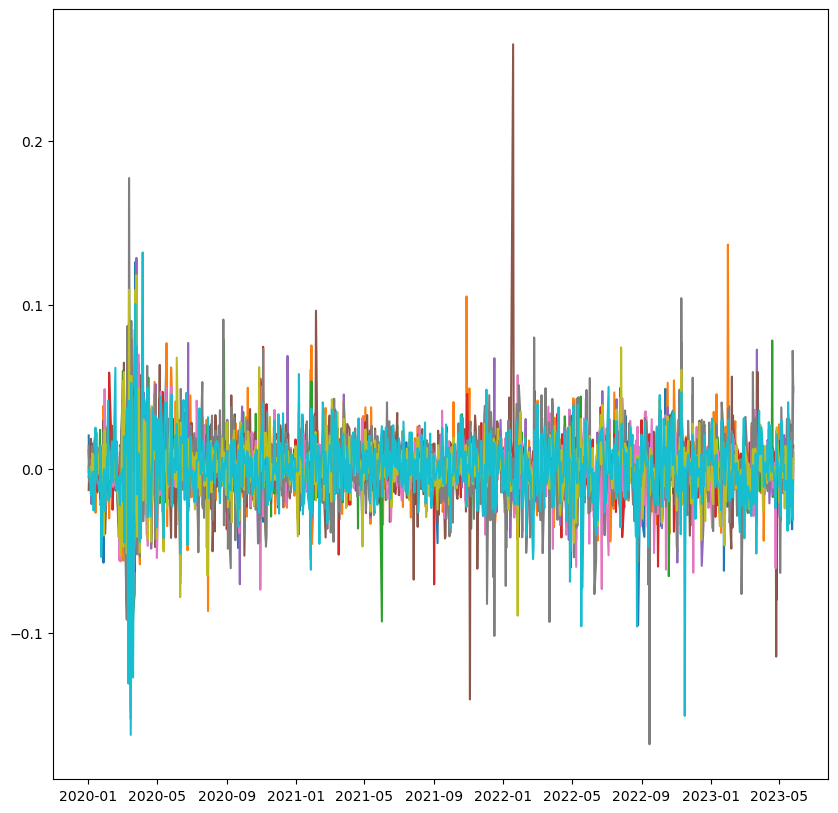

In [528]:
# Returns of a variety of stocks

plt.figure(figsize=(10,10))
plt.plot(returns.iloc[:, 0:10], label=returns.columns[0:10])
plt.show()

(b) 

**I expected the factors (somewhat similar to market index, value factor, etc.) to appear for the principal components with higher priority. I performed PCA against a timeline, setting them up as records, and each S&P 500 stock as a field. The following are the results and the analysis.**

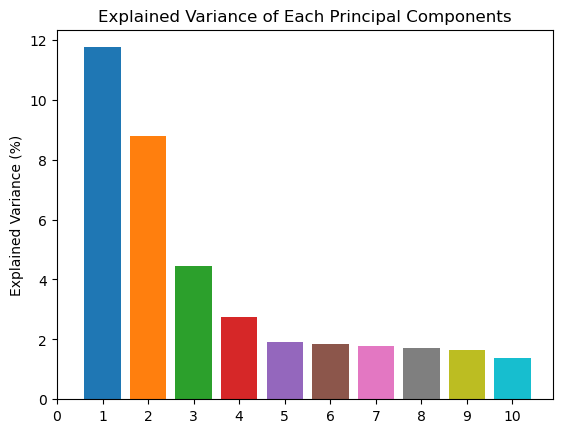

In [529]:
#(b)
# PCA analysis was performed using a timeline as records and S&P 500 stocks as fields

data = returns.transpose()
normlizer=StandardScaler()
normlizer.fit(data)
scaled_returns=normlizer.transform(data)

def pca(scaled_returns, n_components=10):
    pca=PCA(n_components=n_components)
    pca.fit(scaled_returns)
    for i in range(0,n_components):
        plt.bar(i+1, pca.explained_variance_ratio_[i]*100)
    plt.title("Explained Variance of Each Principal Components")
    plt.xticks(range(0,11))
    plt.ylabel("Explained Variance (%)")
    plt.show()
    return pca

pca_result = pca(scaled_returns)

In [530]:
print("Initial Size:",scaled_returns.shape)
returns_pca = pca_result.transform(scaled_returns)
print("Size after pca:",returns_pca.shape)
print("Size of the projection matrix of pca:",pca_result.components_.shape)

Initial Size: (495, 857)
Size after pca: (495, 10)
Size of the projection matrix of pca: (10, 857)


(c) 

To replicate the returns of sp500, first of all, I used the EWI sp500 to simpize the process where i can just calculate the returns and exposures to each principal components of EWI sp500 by calculating its means.

Then, based on the assumption that each stock is a linear expansion of the components, I calculated backwards the returns of each component through timeline by using the stock's returns which is clearly known.

Furthermore, explained variances of principal components were used as a measure of EWI S&P 500's exposure to each principal component afterwards.

Since the data were normalized, the projection matrix of each stock onto the principal components has a sum of zero for each component. Therefore, the method of calculating the S&P 500's exposure to each component using the mean of each stock's coefficient of linear decomposition will always result in zero.

Based on the model's assumption that each stock is a linear expansion of the components, I approximated the square root of the variance ratio as the measure of EWI S&P 500's exposure to each component.

In [531]:
# Getting the return of each principal component

principal_components_returns = pd.DataFrame(np.dot(returns, pd.DataFrame(pca_result.transform(scaled_returns))))
principal_components_returns

,0,1,2,3,4,5,6,7,8,9
0,10.201132,36.997664,5.696603,-3.208266,-1.692380,-2.383945,-2.959960,7.655876,-9.212693,-1.235798
1,-14.307090,-14.403348,3.957291,9.562044,8.248321,1.645443,-1.261327,-2.786748,1.658372,-2.703538
2,-7.626639,-6.761640,8.103571,6.136918,-0.662156,2.090484,-1.754828,-4.365984,-4.312025,-3.760820
3,12.939167,17.010595,14.029581,0.062099,-1.031071,-4.002762,-0.274214,0.887147,2.023461,-1.501779
4,-13.706412,12.861956,-13.785213,-2.155834,-0.825066,0.429712,-3.173663,4.462053,-4.587199,0.907457
...,...,...,...,...,...,...,...,...,...,...
852,11.503613,14.388172,0.970649,-1.559268,-1.557189,10.798018,-6.618401,0.125863,2.189250,-2.769412
853,14.090231,-20.699650,5.251986,-4.570678,-2.595724,9.661929,2.254613,4.407315,7.880113,2.454664
854,-6.906920,-7.190929,12.218449,7.102385,-0.585169,-3.481285,3.158342,-0.597322,-5.843597,-2.884161
855,2.140726,48.987726,-2.374144,-10.611422,-1.030666,-15.577168,-9.381073,4.215198,3.523293,0.590732


In [532]:
# calculating the exposures of the EWI sp500 to the principal component
# Note that I divided by 495 because, for EWI, the effect of each stock decreases by a factor of 1/495.

exposures_to_components = np.sqrt(pca_result.explained_variance_ratio_)/495
exposures_to_components

array([0.00069244, 0.00059839, 0.00042589, 0.00033429, 0.00028002,
       0.00027441, 0.00026849, 0.0002639 , 0.00025797, 0.00023637])

In [533]:
# Note that using each mean of stock's coefficient of linear decomposition to the components will result in zeros.

pd.DataFrame(pca_result.transform(scaled_returns)).mean()

0   -2.045502e-16
1    4.844610e-17
2    5.158612e-17
3   -1.884015e-17
4    5.853903e-17
5    1.592441e-17
6    2.960595e-17
7    5.921189e-17
8    6.459479e-17
9   -8.253779e-17
dtype: float64

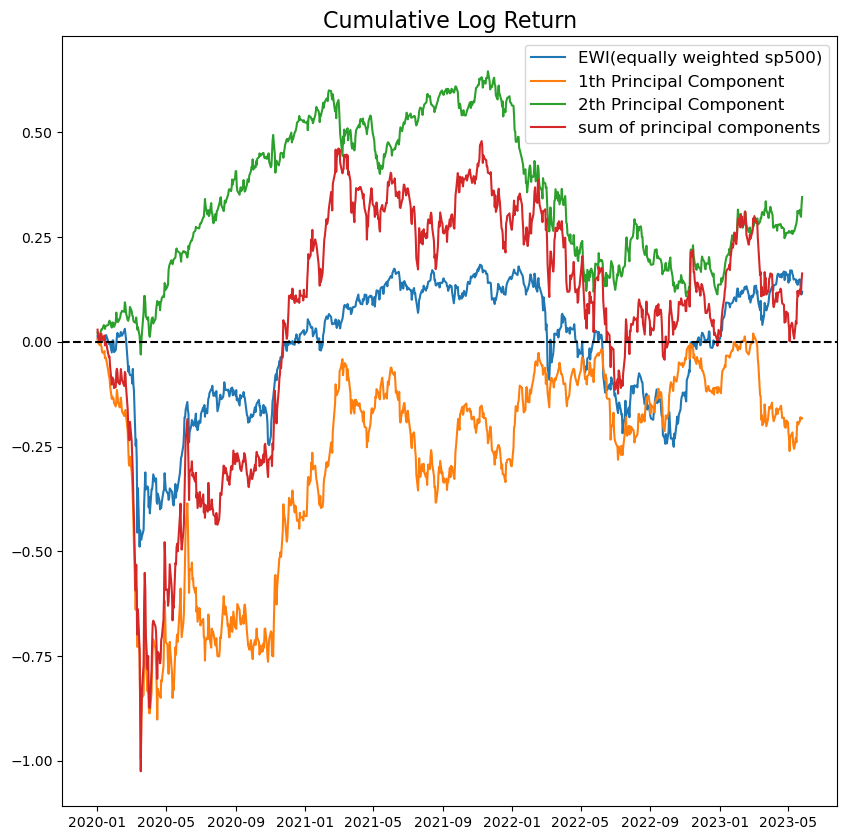

In [534]:
# (c)
def calculate_cumulative_log_return(daily_return):
    return np.log(daily_return+1).cumsum()
  
plt.figure(figsize=(10,10))
df=pd.DataFrame(calculate_cumulative_log_return(sp500['Adj Close'].pct_change().dropna()))
n=2
for i in range(n):
    df[str(i+1)+'th Principal Component']=np.array(calculate_cumulative_log_return(principal_components_returns.iloc[:,i]*exposures_to_components[i]))
df['sum of principal components']=df.iloc[:, 1:n+1].apply(sum, axis=1)
df.rename(columns={'Adj Close':'EWI(equally weighted sp500)'}, inplace=True)
plt.plot(df.dropna(), label=df.columns)
plt.title('Cumulative Log Return', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.show()

Analysis:

We can observe that the sum of the returns of the first and second principal components tends to align with the real EWI component.

As I incorporate more components and consider their returns, I have noticed that the sum of the component returns becomes more positive (optimistic) and deviates from the real data.

The first component displayed significant pessimism in January 2020, causing a drawdown in the index. However, around May 2022, it exhibited some resistance relative to the index and the second component.

The second component showed more optimistic views around 2020 but led to a drawdown in the index in 2022.

It is challenging to attribute specific meanings to each component since PCA assumes that the components are orthonormal, resulting in almost zero correlation among them. However, in the real world, well-known factors are not completely independent.

Each component may capture the original effective aspects of factors, where their correlated parts are eliminated and, therefore, aim to be independent.